This is based on the tutorial Simoni Thomas: 
https://github.com/simoninithomas/Deep_reinforcement_learning_Course/blob/master/Deep%20Q%20Learning/Doom/Deep%20Q%20learning%20with%20Doom.ipynb

In [8]:
import numpy as np
import vizdoom
import matplotlib.pyplot as plt
import random
import time
from skimage import transform
from collections import deque

c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


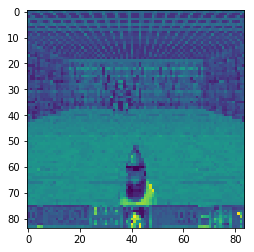

In [33]:
def preprocess_frame(img):
    x = np.mean(img, -1)
    x = x / 255.
    x = x[30:-10,30:-30]
    x = transform.resize(x, [image_size, image_size])
    return x
x = preprocess_frame(img)
plt.imshow(x)

In [162]:
class Env():
    def __init__(self):
        self.game = vizdoom.DoomGame()
        # Load the correct configuration
        self.game.load_config("basic.cfg")
        # Load the correct scenario (in our case basic scenario)
        self.game.set_doom_scenario_path("basic.wad")
        self.game.init()
        # Here our possible actions
        left = [1, 0, 0]
        right = [0, 1, 0]
        shoot = [0, 0, 1]
        self.possible_actions = [left, right, shoot]
    
    def get_state(self):
        state = self.game.get_state()
        img = state.screen_buffer
        img = np.moveaxis(img, 0, -1)
        return preprocess_frame(img)
    
    def step(self, action):
        reward = self.game.make_action(action)
        return reward
    
    def is_episode_finished(self):
        return self.game.is_episode_finished()
    
    def new_episode(self):
        self.game.new_episode()
        
    def close(self):
        self.game.close()

c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\stig\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


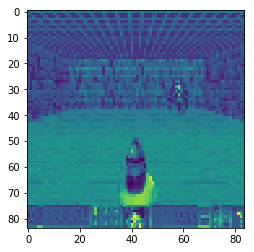

In [161]:
env = Env()
env.step([1, 0, 0])
img = env.get_state()
plt.imshow(img)

In [59]:
image_size = 84
total_episodes = 500
memory_size = 1000000

In [54]:
class FrameStacker():
    def __init__(self, maxlen=4):
        self.maxlen = maxlen
        self.reset()
    
    def reset(self):
        self.frames = deque([np.zeros((image_size, image_size)) for i in range(self.maxlen)], self.maxlen)
        
    def stack(self, frame):
        self.frames.append(frame)
        return np.array(list(self.frames))

In [55]:
frame_stacker = FrameStacker()

In [58]:
frame_stacker.stack(np.random.randn(84, 84)).shape

(4, 84, 84)

In [144]:
class ReplayBuffer():
    def __init__(self, maxlen):
        self.buffer = deque(maxlen=maxlen)
    
    def add(self, experience_sample):
        self.buffer.append(experience_sample)
    
    def sample(self, num_samples):
        idxs = np.random.choice(self.buffer, num_samples, replace=False)
        print(self.buffer)
        return idxs

In [165]:
def random_action_selector():
    num_actions = len(env.possible_actions)
    action_id = np.random.choice(range(num_actions))
    return env.possible_actions[action_id]

In [ ]:
class GamePlayer():
    def __init__(self, env, buffer, actions_selector):
        self.env = env
        self.buffer = buffer
        self.action_selector = action_selector
        
    def play(num_steps):
        i = 0
        while i < num_steps:
            action = self.action_selector()
            reward = env.step()
            state = env.get_state()
            finished = env.is_episode_finished()
            if finished:
                